# <div style="text-align:center; color:rgba(37, 40, 80);">11752 Machine Learning</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Master in Intelligent Systems</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Universitat de les Illes Balears</div>

### <div style="text-align:center; color:white;"> Handout #2: **Supervised learning**</div>

#### **Integrants:** Jason Adel Noboa Rivera, Pedro Marti Pico
#### **Group:** 07

##### T0. Normalize the dataset samples using max-min normalization and consider the following cases:



In [1]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

from scipy.linalg import inv, det

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score


from sklearn.neighbors import KernelDensity         #T3
from sklearn.naive_bayes import GaussianNB          #T4
from sklearn.linear_model import LogisticRegression #T5
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean



In [2]:
df = pd.read_csv('ds07.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.617,0.953,2.0,-4.162,1.0,0.0693,0.1190,0.000,0.3310,0.5940,154.964,192200.0,0
1,0.893,0.480,1.0,-3.728,0.0,0.3560,0.0085,0.000,0.1160,0.3820,86.976,170638.0,0
2,0.816,0.726,5.0,-3.998,0.0,0.1290,0.0990,0.000,0.3720,0.6500,136.048,253390.0,0
3,0.807,0.425,7.0,-8.452,1.0,0.0656,0.0169,0.891,0.0614,0.6600,125.987,308929.0,0
4,0.713,0.389,1.0,-8.157,1.0,0.0839,0.1650,0.637,0.0706,0.2170,178.070,167497.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.857,0.621,9.0,-6.376,0.0,0.0824,0.1480,0.000,0.0865,0.6680,97.986,204467.0,1
500,0.843,0.391,2.0,-7.899,1.0,0.0845,0.1810,0.000,0.1370,0.4960,129.972,160627.0,1
501,0.654,0.630,10.0,-4.644,1.0,0.0259,0.1530,0.000,0.1110,0.4300,89.991,167693.0,1
502,0.505,0.340,4.0,-9.005,1.0,0.0438,0.5760,0.000,0.2100,0.0916,101.993,206459.0,1


a. **case A.** All features.

In [3]:
#Case A
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
dfA = pd.DataFrame(scaler.transform(df),columns=df.columns)
dfA['class'] = df['class']
dfA

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.556916,0.954128,0.181818,0.821527,1.0,0.072033,0.123444,0.000000,0.324465,0.600043,0.697354,0.301882,0
1,0.894737,0.449541,0.090909,0.850778,0.0,0.538211,0.008817,0.000000,0.101018,0.371496,0.183935,0.255503,0
2,0.800490,0.711969,0.454545,0.832581,0.0,0.169106,0.102697,0.000000,0.367075,0.660414,0.554508,0.433500,0
3,0.789474,0.390868,0.636364,0.532385,1.0,0.066016,0.017531,0.952941,0.044274,0.671194,0.478531,0.552962,0
4,0.674419,0.352464,0.090909,0.552268,1.0,0.095772,0.171162,0.681283,0.053835,0.193618,0.871842,0.248747,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.850673,0.599957,0.818182,0.672306,0.0,0.093333,0.153527,0.000000,0.070360,0.679819,0.267078,0.328268,1
500,0.833537,0.354598,0.181818,0.569657,1.0,0.096748,0.187759,0.000000,0.122843,0.494394,0.508624,0.233969,1
501,0.602203,0.609558,0.909091,0.789041,1.0,0.001463,0.158714,0.000000,0.095822,0.423243,0.206703,0.249168,1
502,0.419829,0.300192,0.363636,0.495114,1.0,0.030569,0.597510,0.000000,0.198711,0.058430,0.297337,0.332553,1


b. **case B.** Best two features according to PCA.

In [4]:
#Case B
pca = PCA(n_components = 2)
dfB = pca.fit(df).transform(df)
columns = ['Feature1','Feature2']
dfB = pd.DataFrame(dfB, columns=columns)
scaler.fit(dfB)
dfB = pd.DataFrame(scaler.transform(dfB),columns=dfB.columns)
dfB['class'] = df['class']
dfB

,Feature1,Feature2,class
0,0.301882,0.700825,0
1,0.255503,0.191712,0
2,0.433500,0.566174,0
3,0.552962,0.496945,0
4,0.248747,0.870492,0
...,...,...,...
499,0.328268,0.276918,1
500,0.233969,0.511099,1
501,0.249168,0.213311,1
502,0.332553,0.307277,1


Function to fill de xlsx 

In [5]:
def fill_xlsx(i,B=None,C=None,D=None,E=None,F=None,G=None,H=None,I=None,J=None,K=None,L=None,M=None,N=None,O=None,P=None,Q=None):
    
    # Abrimos el archivo Excel
    wb = openpyxl.load_workbook("results.xlsx")

    # Obtenemos la hoja de cálculo
    sheet = wb["Hoja1"]
    
    # Rellenamos la celda
    sheet["B" + str(i)] = '-' if B is None != '-' else B
    sheet["C" + str(i)] = '-' if C is None != '-' else C
    sheet["D" + str(i)] = '-' if D is None != '-' else D
    sheet["E" + str(i)] = '-' if E is None != '-' else E
    sheet["F" + str(i)] = '-' if F is None != '-' else F
    sheet["G" + str(i)] = '-' if G is None != '-' else G
    sheet["H" + str(i)] = '-' if H is None != '-' else H
    sheet["I" + str(i)] = '-' if I is None != '-' else I
    sheet["J" + str(i)] = '-' if J is None != '-' else J
    sheet["K" + str(i)] = '-' if K is None != '-' else K
    sheet["L" + str(i)] = '-' if L is None != '-' else L
    sheet["M" + str(i)] = '-' if M is None != '-' else M
    sheet["N" + str(i)] = '-' if N is None != '-' else N
    sheet["O" + str(i)] = '-' if O is None != '-' else O
    sheet["P" + str(i)] = '-' if P is None != '-' else P
    sheet["Q" + str(i)] = '-' if Q is None != '-' else Q
    
    # Guardamos el archivo
    wb.save("results.xlsx")

##### T1. **(only for case B)** Assuming that class data follow a 2D Gaussian distribution, consider the **quadratic Bayesian classifier** case, i.e. different covariance matrices for each class, find and report the discrimination function g_i (x) for each class ω_i, i.e. g_i (x)=a_i x_1^2+b_i x_2^2+c_i x_1 x_2+d_i x_1+e_i x_2+f_i, and evaluate its performance. <u>HINT</u>: You need to calculate the mean and a covariance matrix for each class.

A custom function `calculateCoeff` was implemented to compute the coefficients of the quadratic 
discrimination functions based on the covariance matrix and the mean vector for each class. The 
dataset was split into training and testing sets, and the mean and covariance matrix for each class 
were calculated.

In [6]:
def calculateCoeff(covMatrix, u, c):
    # Calculate the determinant of the covariance matrix
    detcovMatrix = np.linalg.det(covMatrix)

    # Compute the coefficients for the quadratic terms
    A = -(covMatrix[1,1])/(2*detcovMatrix)
    B = -(covMatrix[0,0])/(2*detcovMatrix)

    # Compute the coefficient for the cross-product term
    C = covMatrix[0,1]/detcovMatrix

    # Compute the coefficients for the linear terms
    D = ((u[0]*covMatrix[1,1])-(u[1]*covMatrix[0,1]))/detcovMatrix
    E = ((u[1]*covMatrix[0,0])-(u[0]*covMatrix[0,1]))/detcovMatrix

    # Compute the constant term
    F = -(((u[0]**2)*covMatrix[1,1])+((u[1]**2)*covMatrix[0,0])-(2*u[0]*u[1]*covMatrix[0,1]))/(2*detcovMatrix) + c

    return A, B, C, D, E, F

In [23]:
# Split the dataset into training and testing sets
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)

# Separate the data by class
dfBW0 = dfB_Train[dfB_Train['class'] == 0].drop('class', axis=1)
dfBW1 = dfB_Train[dfB_Train['class'] == 1].drop('class', axis=1)

# Calculate the mean of each feature for each class
meanW0 = np.array([dfBW0['Feature1'].mean() , dfBW0['Feature2'].mean()])
meanW1 = np.array([dfBW1['Feature1'].mean() , dfBW1['Feature2'].mean()])

# Calculate the covariance matrix for each class
covMatrixW0 = np.cov(dfBW0, rowvar=False)
covMatrixW1 = np.cov(dfBW1, rowvar=False)


# DISCRIMINANT FUNCTION CREATION
prior = 0.5  # Set the prior probability for the classes as equal
c0 = - 0.5 * np.log(det(covMatrixW0)) - np.log(2*math.pi)
c1 = - 0.5 * np.log(det(covMatrixW1)) - np.log(2*math.pi)

# Evaluate the discriminant function for each point in the test set
X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    # Calculate the discriminant score for class 0
    g0 = -0.5 * X[i].T @ inv(covMatrixW0) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ X[i] - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
    
    # Calculate the discriminant score for class 1
    g1 = -0.5 * X[i].T @ inv(covMatrixW1) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ X[i] - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1

    # Classify the point based on which discriminant score is higher
    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


# Output the formulas for the discriminant functions with calculated coefficients
print("The derived formulas for the discrimination functions are as follows:")

A0, B0, C0, D0, E0, F0 = calculateCoeff(covMatrixW0,meanW0, c0)
print('Formula g1(x): ',A0.round(2),'x1^2  + ',B0.round(2),'x2^2  + ',C0.round(2),'x1x2  + ',D0.round(2),'x1  + ',E0.round(2),'x2  + ',F0.round(2))

A1, B1, C1, D1, E1, F1 = calculateCoeff(covMatrixW1, meanW1, c1)
print('Formula g2(x): ',A1.round(2),'x1^2  + ',B1.round(2),'x2^2  + ',C1.round(2),'x1x2  + ',D1.round(2),'x1  + ',E1.round(2),'x2  + ',F1.round(2))

print('Formula g12(x): ',(A0-A1).round(2),'x1^2  + ',(B0-B1).round(2),'x2^2  + ',(C0-C1).round(2),'x1x2  + ',(D0-D1).round(2),'x1  + ',(E0-E1).round(2),'x2  + ',(F0-F1).round(2))

# Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)

# Write results on xlsx
fill_xlsx(i=3,
          J=accuracy_score(y, predictions), 
          L=precision_score(y, predictions),
          N=recall_score(y, predictions),
          P=f1_score(y, predictions))

print(f'\nMetrics:\n - Accuracy: {accuracy_score(y, predictions)}\n - Precision: {precision_score(y, predictions)}\n - Recall: {recall_score(y, predictions)}\n - F1_Score: {f1_score(y, predictions)}')

The derived formulas for the discrimination functions are as follows:
Formula g1(x):  -24.5 x1^2  +  -12.87 x2^2  +  -3.55 x1x2  +  20.22 x1  +  12.99 x2  +  -5.05
Formula g2(x):  -111.46 x1^2  +  -13.54 x2^2  +  17.33 x1x2  +  61.81 x1  +  6.59 x2  +  -8.6
Formula g12(x):  86.96 x1^2  +  0.67 x2^2  +  -20.88 x1x2  +  -41.59 x1  +  6.4 x2  +  3.55

Metrics:
 - Accuracy: 0.6776315789473685
 - Precision: 0.6218487394957983
 - Recall: 0.9487179487179487
 - F1_Score: 0.751269035532995


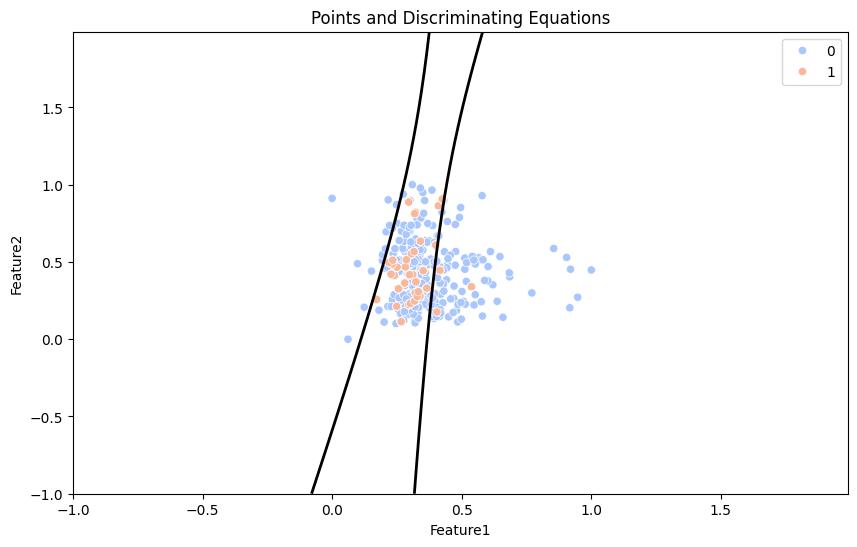

In [8]:
# Assuming that the data division and calculation of means and covariances have been completed

# Create a grid of points for visualization
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calculate the discriminant functions for each point in the grid
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

# Iterate over the grid and compute the discriminant scores
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])

        # Compute the discriminant score for class 0
        g0 = -0.5 * point.T @ inv(covMatrixW0) @ point + 0.5 * point.T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ point - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
        
        # Compute the discriminant score for class 1
        g1 = -0.5 * point.T @ inv(covMatrixW1) @ point + 0.5 * point.T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ point - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1
        
        # Store the discriminant scores for later visualization
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

# Set the title and labels for the plot
plt.title('Points and Discriminating Equations')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()


### Evaluation of the classification results:


The quadratic Bayesian classifier has demonstrated a capacity to distinguish between the two classes with a high recall of 94.9%, indicating a strong ability to identify the positive class. However, its precision is moderately low at 62.2%, suggesting that it may be overly inclusive, resulting in a significant number of false positives. Despite this, the F1-score of 75.1% reflects a reasonable balance between precision and recall, which might be suitable for applications where missing a positive is more critical than incorrectly labeling a negative.

The decision boundaries in the scatter plot corroborate the classifier's tendency to favor recall over precision. While the accuracy of 67.8% is not exceptional, it may be acceptable depending on the specific context and the costs associated with misclassification. Overall, the classifier's performance is decent, but improvements should be considered if a higher precision is required.


#### T2. **(only for case B)** Assuming that class data follow a 2D Gaussian distribution, consider the **linear Bayesian classifier** case, i.e. same covariance matrix for each class, find and report the discrimination function gix for each class i, i.e. gix=aix1+bix2+ci, and evaluate its performance. <u>HINT</u>: You need to calculate the mean for each class and a single covariance matrix for the full dataset, shared by all classes.

In [24]:
# Calculate a single covariance matrix for all classes by dropping the class column
covMatrix2Class = np.cov(dfB_Train.drop('class', axis=1), rowvar=False)

#DISCRIMINATION FUNCTION CREATION
prior = 0.5  # Set the prior probability for the classes as equal (equiprobable classes)

'''
Calculate the constant term 'c' for the discriminant functions, using the determinant of the
combined covariance matrix. This constant term is the same for both classes.
'''
c = - 0.5 * np.log(det(covMatrix2Class)) - np.log(2*math.pi)

# Prepare the test data for prediction
X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

# Iterate over each test example to compute discriminant scores and make predictions
for i in range(len(X)):
    # Compute the discriminant score for class 0
    g0 = -0.5 * X[i].T @ inv(covMatrix2Class) @ X[i] + 0.5 * X[i].T @ inv(covMatrix2Class) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrix2Class) @ X[i] - 0.5 * meanW0.T @ inv(covMatrix2Class) @ meanW0 + np.log(prior) + c
    
    # Compute the discriminant score for class 1
    g1 = -0.5 * X[i].T @ inv(covMatrix2Class) @ X[i] + 0.5 * X[i].T @ inv(covMatrix2Class) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrix2Class) @ X[i] - 0.5 * meanW1.T @ inv(covMatrix2Class) @ meanW1 + np.log(prior) + c

    # Compare the discriminant scores and predict the class with the higher score
    predictions.append(0 if g0 > g1 else 1)


# Retrieve the determinant of the combined covariance matrix for use in the discriminant function
detcovMatrix = np.linalg.det(covMatrix2Class)

# Calculate the coefficients of the discriminant function for class 0
A0, B0, C0, D0, E0, F0 = calculateCoeff(covMatrix2Class,meanW0, c)
print('Formula W0: ',D0.round(2),'x1  + ',E0.round(2),'x2  + ',F0.round(2))

# Calculate the coefficients of the discriminant function for class 1
A1, B1, C1, D1, E1, F1 = calculateCoeff(covMatrix2Class,meanW1, c)
print('Formula W1: ',D1.round(2),'x1  + ',E1.round(2),'x2  + ',F1.round(2))



# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y, predictions)
#print('Exactitud (Accuracy):', (accuracy*100).round(2),'%')


fill_xlsx(i=4,
          J=accuracy_score(y, predictions), 
          L=precision_score(y, predictions),
          N=recall_score(y, predictions),
          P=f1_score(y, predictions))
          
# Record the model performance metrics into an Excel
print(f'\nMetrics:\n - Accuracy: {accuracy_score(y, predictions)}\n - Precision: {precision_score(y, predictions)}\n - Recall: {recall_score(y, predictions)}\n - F1_Score: {f1_score(y, predictions)}')

Formula W0:  27.17 x1  +  11.45 x2  +  -5.83
Formula W1:  22.26 x1  +  11.23 x2  +  -4.03
Exactitud (Accuracy): 66.45 %

Metrics:
 - Accuracy: 0.6644736842105263
 - Precision: 0.6310679611650486
 - Recall: 0.8333333333333334
 - F1_Score: 0.718232044198895


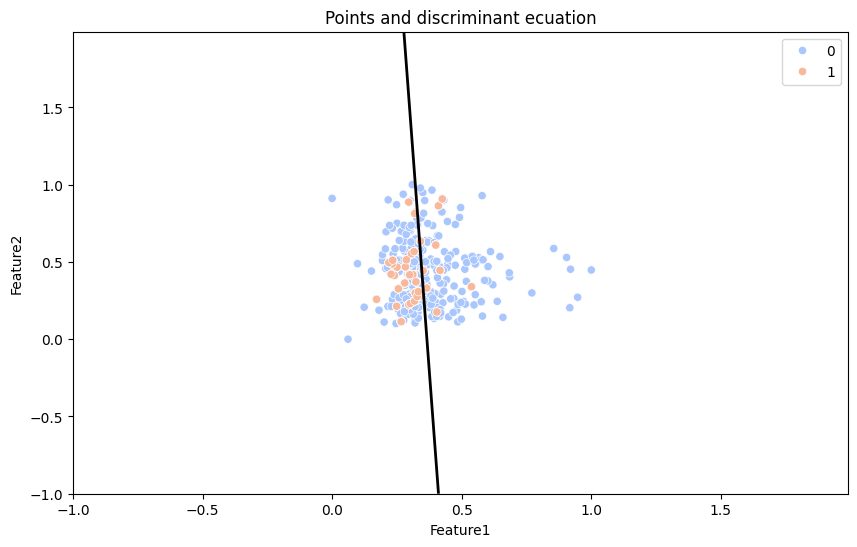

In [25]:
# Create a grid of points for visualization
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calculate the discriminant functions for each point in the grid
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])

        # Compute the discriminant scores for each class
        g0 = -0.5 * point.T @ inv(covMatrix2Class) @ point + 0.5 * point.T @ inv(covMatrix2Class) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrix2Class) @ point - 0.5 * meanW0.T @ inv(covMatrix2Class) @ meanW0 + np.log(prior) + c
        g1 = -0.5 * point.T @ inv(covMatrix2Class) @ point + 0.5 * point.T @ inv(covMatrix2Class) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrix2Class) @ point - 0.5 * meanW1.T @ inv(covMatrix2Class) @ meanW1 + np.log(prior) + c
        
        # Store the scores in Z0 and Z1 for visualization
        Z0[i, j] = g0
        Z1[i, j] = g1

# Plot the data points and decision regions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Points and discriminant ecuation')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()

## Evaluation of our linear Bayesian classifier

The resulting linear equations for the discriminant functions are:
* For class 0 (W0): 27.17 * Feature1 + 11.45 * Feature2 - 5.83
* For class 1 (W1): 22.26 * Feature1 + 11.23 * Feature2 - 4.03

The provided metrics for this classifier are:
* Accuracy: 66.45%
* Precision: 63.11%
* Recall: 83.33%
* F1 Score: 71.82%


Using a single covariance matrix for both classes results in linear discriminant functions, a simpler model than the quadratic classifier from Task T1. This approach indicates a presumption of uniform variance across classes, leading to a modest decrease in model performance. With an accuracy of 66.45% and precision just over 63%, the classifier is less adept at correctly predicting class labels and avoiding false positives compared to the more complex model in Task T1. However, the high recall of over 83% suggests it still effectively identifies the positive class.

The linear decision boundary visualized in the scatter plot suggests that while the model is computationally efficient, it sacrifices some accuracy and precision for this simplicity. Despite a slight reduction in performance metrics, the model’s high recall could be advantageous in scenarios where identifying positive instances is paramount. This balance may be suitable for specific applications but may require further refinement or complexity to improve precision and overall accuracy.

## T3. (Cases A and B)

In [11]:
def splitDF(dataFrame):
    x = np.array(dataFrame.drop('class',axis=1))
    y = np.array(dataFrame['class'])
    return x, y

def split_Class(df_Train,df_Test):
    # Separamos las clases 
    dfW0_Train = df_Train[df_Train['class'] == 0]
    dfW1_Train = df_Train[df_Train['class'] == 1]

    # Dividir los datos de entrenamiento en características y clases
    xW0_Train = np.array(dfW0_Train.drop('class', axis=1))
    xW1_Train = np.array(dfW1_Train.drop('class', axis=1))

    # Dividimos los datos de prueba
    x_Test, y_Test = splitDF(df_Test)

    return xW0_Train, xW1_Train, x_Test, y_Test

def calculatehN(xW0_Train,xW1_Train):
    hNW0 = 1/(math.sqrt(len(xW0_Train)))
    hNW1 = 1/(math.sqrt(len(xW1_Train)))
    return hNW0, hNW1

def calculateModelKDE(xW0_Train, xW1_Train, x_Test, y_Test, hNW0, hNW1):
    # Entrenamos el modelo para cada clase
    kdeW0 = KernelDensity(bandwidth=hNW0, kernel='gaussian').fit(xW0_Train)
    kdeW1 = KernelDensity(bandwidth=hNW1, kernel='gaussian').fit(xW1_Train)

    # Calculate log-likelihoods for test data
    logLikelihoodW0 = kdeW0.score_samples(x_Test)
    logLikelihoodW1 = kdeW1.score_samples(x_Test)

    # Calculate posterior probabilities
    probW0 = np.exp(logLikelihoodW0)
    probW1 = np.exp(logLikelihoodW1)

    # Make predictions based on the class with higher posterior probability
    predictions = (probW1 > probW0).astype(int)

    # Evaluate the performance
    accuracy = accuracy_score(y_Test, predictions)

    return accuracy, predictions

In [12]:
'''
Dividimos el dataset en clases
'''
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)
dfA_Train, dfA_Test = train_test_split(dfA, test_size=0.3, random_state=100)

xBW0_Train, xBW1_Train, xB_Test, yB_Test = split_Class(dfB_Train, dfB_Test)
xAW0_Train, xAW1_Train, xA_Test, yA_Test = split_Class(dfA_Train, dfA_Test)

hNAW0, hNAW1 = calculatehN(xAW0_Train, xAW1_Train)
hNBW0, hNBW1 = calculatehN(xBW0_Train, xBW1_Train)


'''
Entrenamos el Modelo para Caso B
'''
accuracyA, predicitonsA = calculateModelKDE(xAW0_Train, xAW1_Train, xA_Test, yA_Test, hNAW0, hNAW1)
accuracyB, predictionsB = calculateModelKDE(xBW0_Train, xBW1_Train, xB_Test, yB_Test, hNBW0, hNBW1)


'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Accuracy): ',(accuracyA*100).round(2),'%')
print('Exactitud Caso B (Accuracy): ',(accuracyB*100).round(2),'%')
fill_xlsx(i=5,
          B=accuracy_score(y, predicitonsA), 
          D=precision_score(y, predicitonsA),
          F=recall_score(y, predicitonsA),
          H=f1_score(y, predicitonsA),
          J=accuracy_score(y, predictionsB), 
          L=precision_score(y, predictionsB),
          N=recall_score(y, predictionsB),
          P=f1_score(y, predictionsB))


Exactitud Caso A (Accuracy):  92.76 %
Exactitud Caso B (Accuracy):  67.76 %


## T4. (Cases A and B)

In [13]:
def calculateModel_crossValidation(x, y, rskf, model):
    accuracy = []
    precision = []
    recall = []
    f1_s = []
    
    for trainIndex, testIndex in rskf.split(x,y):
        x_Train, x_Test = x[trainIndex], x[testIndex]
        y_Train, y_Test = y[trainIndex], y[testIndex]
        # Entrenamos el modelo para cada clase
        trainModel = model.fit(x_Train, y_Train) #Usar crossvalidation

        # Make predictions based on the class with higher posterior probability
        predictions = trainModel.predict(x_Test)

        # Evaluate the performance
        accuracy.append(accuracy_score(y_Test, predictions))
        precision.append(precision_score(y_Test, predictions))
        recall.append(recall_score(y_Test, predictions))
        f1_s.append(f1_score(y_Test, predictions))
    return accuracy, predictions, precision, recall, f1_s

In [14]:
xA, yA = splitDF(dfA)
xB, yB = splitDF(dfB)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
modelT4 = GaussianNB()

accuracyT4A, predictionsA, precisionT4A, recallT4A, f1_sT4A = calculateModel_crossValidation(xA, yA, rskf, modelT4)
accuracyT4B, predictionsB, precisionT4B, recallT4B, f1_sT4B = calculateModel_crossValidation(xB, yB, rskf, modelT4)

'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT4A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT4A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT4B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT4B).round(5))

'''
Escribimos en la tabla de resultados
'''
fill_xlsx(i=6,
          B=np.mean(accuracyT4A), C=np.std(accuracyT4A), 
          D=np.mean(precisionT4A), E=np.std(precisionT4A), 
          F=np.mean(recallT4A), G=np.std(recallT4A), 
          H=np.mean(f1_sT4A), I=np.std(f1_sT4A), 
          J=np.mean(accuracyT4B), K=np.std(accuracyT4B), 
          L=np.mean(precisionT4B), M=np.std(precisionT4B), 
          N=np.mean(recallT4B), O=np.std(recallT4B), 
          P=np.mean(f1_sT4B), Q=np.std(f1_sT4B))

Exactitud Caso A (Prom):  71.16 %
Desviación Estándar Caso A:  0.05564
Exactitud Caso B (Prom):  59.99 %
Desviación Estándar Caso B:  0.05037


#### T5. **(cases A and B)** Make use of the implementation of logistic regression (LR) available in scikit-learn and evaluate the resulting classifier. <u>HINT</u>: The scikit-learn implementation of LR is available as object LogisticRegression. Do not incorporate any regularization term (penalty = None).


In [15]:
# Initialize the Logistic Regression model without any penalty term for regularization
modelT5 = LogisticRegression(penalty=None)

'''Evaluation of the logistic regression model on Case A data using cross-validation
and store the performance metrics.'''
accuracyT5A, predictionsA, precisionT5A, recallT5A, f1_sT5A = calculateModel_crossValidation(xA, yA, rskf, modelT5)
accuracyT5B, predictionsB, precisionT5B, recallT5B, f1_sT5B = calculateModel_crossValidation(xB, yB, rskf, modelT5)

'''
Print the results
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT5A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT5A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT5B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT5B).round(5))

'''
Record the model performance metrics into an Excel
'''
fill_xlsx(i=7,
          B=np.mean(accuracyT5A), C=np.std(accuracyT5A), 
          D=np.mean(precisionT5A), E=np.std(precisionT5A), 
          F=np.mean(recallT5A), G=np.std(recallT5A), 
          H=np.mean(f1_sT5A), I=np.std(f1_sT5A), 
          J=np.mean(accuracyT5B), K=np.std(accuracyT5B), 
          L=np.mean(precisionT5B), M=np.std(precisionT5B), 
          N=np.mean(recallT5B), O=np.std(recallT5B), 
          P=np.mean(f1_sT5B), Q=np.std(f1_sT5B))

Exactitud Caso A (Prom):  78.83 %
Desviación Estándar Caso A:  0.04094
Exactitud Caso B (Prom):  63.16 %
Desviación Estándar Caso B:  0.04056


## Evaluation of Logistic Regression

In this task we apply  a Logistic Regression model without regularization, applied to two different scenarios, referred to as Case A and Case B. The model's performance in Case A is notably higher, with an average accuracy of 78.83%, compared to 63.16% for Case B. The standard deviation of accuracy across the cross-validation folds is approximately 0.04 for both cases, suggesting a consistent performance from fold to fold.

The difference in accuracy between the two cases may stem from the nature of the data or feature sets used, with Case A likely being a more straightforward problem for logistic regression to solve. The lower accuracy in Case B suggests a more complex or less linearly separable problem, highlighting the potential need for a more sophisticated model or additional feature engineering. Despite this, the consistency in performance as indicated by the low standard deviation is promising, as it suggests the model's predictions are stable across different subsets of the data.

#### T6. **(cases A and B)** Adopt a classifier ensemble approach using the stacking approach, comprising NB, LR and decision tree (DT) classifiers. <u>HINT</u>: The scikit-learn implementation of the DT classifier is available as object DecisionTreeClassifier. Use also a DT for the second layer. For the first layer, regularize the DT imposing a minimum of 10 samples per leaf, while, for the second layer (the blender), impose a maximum depth of 3.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier


# Define base classifiers for the stacking ensemble
base_classifiers = [
    ('NB', GaussianNB()),
    ('LR', LogisticRegression(penalty=None)),
    ('DT', DecisionTreeClassifier(min_samples_leaf=10)) # regularization of DT imposing a minimum of 10 samples per leaf
]

# Maximum depth of 3 for the second layer (the blender)
blender = DecisionTreeClassifier(max_depth=3)

# Create the stacking ensemble model
modelT6 = StackingClassifier(estimators=base_classifiers, final_estimator=blender)



# Evaluate the model for case A and B
accuracyT6A, predictionsA, precisionT6A, recallT6A, f1_sT6A = calculateModel_crossValidation(xA, yA, rskf, modelT6)
accuracyT6B, predictionsB, precisionT6B, recallT6B, f1_sT6B = calculateModel_crossValidation(xB, yB, rskf, modelT6)

'''
Print the results
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT6A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT6A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT6B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT6B).round(5))

'''
Record the model performance metrics into an Excel
'''
fill_xlsx(i=8,
          B=np.mean(accuracyT6A), C=np.std(accuracyT6A), 
          D=np.mean(precisionT6A), E=np.std(precisionT6A), 
          F=np.mean(recallT6A), G=np.std(recallT6A), 
          H=np.mean(f1_sT6A), I=np.std(f1_sT6A), 
          J=np.mean(accuracyT6B), K=np.std(accuracyT6B), 
          L=np.mean(precisionT6B), M=np.std(precisionT6B), 
          N=np.mean(recallT6B), O=np.std(recallT6B), 
          P=np.mean(f1_sT6B), Q=np.std(f1_sT6B))

Exactitud Caso A (Prom):  84.59 %
Desviación Estándar Caso A:  0.04456
Exactitud Caso B (Prom):  76.79 %
Desviación Estándar Caso B:  0.0423


## Evaluation of Stacking Ensemble

For this task, is used a stacking ensemble model, combining base classifiers including Naive Bayes (NB), Logistic Regression (LR), and a regularized Decision Tree (DT), with a Decision Tree as the blending model at the second layer, which we set a minimum of 10 samples per leaf, likely helped to prevent overfitting and contributed to the robustness of the model. With this ensemble approach, we aim to exploit the strengths of each individual classifier and mitigate its weaknesses, potentially leading to a more robust model.

The results from the ensemble model are promising, with Case A achieving an average accuracy of 84.59% and Case B reaching 76.79%. The standard deviations of 0.04456 for Case A and 0.0423 for Case B indicate a consistent performance across the cross-validation folds, suggesting that the ensemble model is stable and reliable.

Overall, the stacking ensemble method has demonstrated an improvement in predictive performance for both cases, showcasing the benefit of leveraging multiple models in a structured way to achieve better generalization. The higher accuracy in both cases, compared to the individual models discussed in previous tasks, underscores the value of ensemble methods in complex classification tasks.

#### T7. **(cases A and B)** Adopt a classifier ensemble approach using the implementation of random forests (RF) available in scikit-learn. <u>HINT</u>: The scikit-learn implementation of RF is available as object RandomForestClassifier.
#### Tune the RF model by means of grid search (with cv = 3) as follows: (1) number of trees among 20, 40 and 60, (2) minimum samples per leaf equal to 5 or 10, and (3) consider the two impurity criteria gini and entropy. HINT: The scikit-learn implementation of grid search is available as object GridSearchCV.


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize a RandomForestClassifier instance
RF = RandomForestClassifier()

# Define a parameter grid to search for the best combination of parameters.
param_grid = {
    'min_samples_leaf': [5, 10],
    'n_estimators': [20, 40, 60], #Nº trees en el forest
    'criterion':['gini', 'entropy'] # Mide la calidad del split
}


'''
Initialize GridSearchCV for both cases A and B.
- 'cv=3' specifies the number of folds in a KFold cross-validation.
- 'verbose=1' will show detailed logging output.
- 'n_jobs=1' specifies that one CPU core should be used to process the grid search in sequence.
'''
grid_search_cvA = GridSearchCV(estimator=RF, param_grid = param_grid, cv=3, verbose=1, n_jobs=1)
grid_search_cvB = GridSearchCV(estimator=RF, param_grid = param_grid, cv=3, verbose=1, n_jobs=1)

'''
Fit the GridSearchCV object to the data for case A and B. This will train the RandomForestClassifier
on the dataset with each combination of parameters in the grid, and use cross-validation to evaluate.
'''
grid_search_cvA.fit(xA, yA)
grid_search_cvB.fit(xB, yB)

# Retrieve the best model found by GridSearchCV for both cases
modelT7A = grid_search_cvA.best_estimator_ # case A
modelT7B = grid_search_cvB.best_estimator_ # case B

# Evaluate the model 
accuracyT7A, predictionsA, precisionT7A, recallT7A, f1_sT7A = calculateModel_crossValidation(xA, yA, rskf, modelT7A)
accuracyT7B, predictionsB, precisionT7B, recallT7B, f1_sT7B = calculateModel_crossValidation(xB, yB, rskf, modelT7B)

'''
Print the best parameters and best score
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT7A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT7A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT7B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT7B).round(5))

print("Best Parameters for Case A:", grid_search_cvA.best_params_)
print("Best Score for Case A:", grid_search_cvA.best_score_)

print("Best Parameters for Case B:", grid_search_cvB.best_params_)
print("Best Score for Case B:", grid_search_cvB.best_score_)

fill_xlsx(i=9,
          B=np.mean(accuracyT7A), C=np.std(accuracyT7A), 
          D=np.mean(precisionT7A), E=np.std(precisionT7A), 
          F=np.mean(recallT7A), G=np.std(recallT7A), 
          H=np.mean(f1_sT7A), I=np.std(f1_sT7A), 
          J=np.mean(accuracyT7B), K=np.std(accuracyT7B), 
          L=np.mean(precisionT7B), M=np.std(precisionT7B), 
          N=np.mean(recallT7B), O=np.std(recallT7B), 
          P=np.mean(f1_sT7B), Q=np.std(f1_sT7B))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Exactitud Caso A (Prom):  92.53 %
Desviación Estándar Caso A:  0.02697
Exactitud Caso B (Prom):  88.24 %
Desviación Estándar Caso B:  0.03842
Best Parameters for Case A: {'criterion': 'gini', 'min_samples_leaf': 5, 'n_estimators': 20}
Best Score for Case A: 0.9265873015873015
Best Parameters for Case B: {'criterion': 'entropy', 'min_samples_leaf': 5, 'n_estimators': 60}
Best Score for Case B: 0.8690476190476191


##  Random Forest Classifier evaluation

For the task 7, we use  Random Forest Classifier, which we hyperparameter tuning through GridSearchCV, that achieved a high accuracy for both cases:

For case A, the model shows an excellent average accuracy of 92.53% with a relatively low standard deviation of 0.02697. The low standard deviation suggests that the model's performance is consistent across different cross-validation folds. The best parameters that achieved this high accuracy are using the 'gini' criterion with a minimum of 5 samples per leaf and 20 trees in the forest. The best score closely aligns with the average accuracy, reinforcing the model's strong performance.

On the other hand, for case B, the average accuracy is slightly lower at 88.24%, but still quite high, with a standard deviation of 0.03842, indicating a bit more variability in the model's performance across the cross-validation folds compared to Case A. The best parameters for Case B include using the 'entropy' criterion with a minimum of 5 samples per leaf and 60 trees, suggesting that Case B might require a more complex model to capture the data's nuances. The best score for Case B is around 86.90%, which is a bit lower than the average accuracy but still indicates a robust model.

Overall, the results demonstrate that the RandomForestClassifier has performed very well in both cases, with particularly high accuracy in Case A. The difference in best parameters between the two cases suggests that the underlying data distributions may differ, requiring different model complexities to capture the respective patterns. The success of the model in both scenarios showcases the effectiveness of ensemble methods like RandomForest, especially when coupled with careful hyperparameter tuning to tailor the model to the specific characteristics of the dataset.

#### T8. For the best model (according to the F​1-score) that you have obtained for your dataset: 
#### a) Generate the classification map for case B using the provided source code given the model object, and the test data Xte,yte.
#### b) Load file dsgg_samples.csv (gg is the group number) and classify the 4 samples x contained therein, indicating also the probability a posteriori for each class pi|x. Notice that, in this way, we can say, for the involved track, the probability of becoming a highly popular song (according to the training data available). <u>HINT</u>: The predict_proba method of scikit-learn classification models of tasks T4 – T7 provide **unnormalized** probabilities per class, i.e. the probabilities do not sum to 1, and so you have to normalize them. Notice that for the cases of tasks T1 – T3 you already get unnormalized probabilities.


C:\Users\Pedro\AppData\Local\Temp\ipykernel_19444\1493913305.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m[k1, k2] = model.predict([x])
C:\Users\Pedro\AppData\Local\Temp\ipykernel_19444\1493913305.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m[k1, k2] = model.predict([x])
C:\Users\Pedro\AppData\Local\Temp\ipykernel_19444\1493913305.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m[k1, k2] = model.predict([x])
C:\Users\Pedro\AppData\Local\Temp\

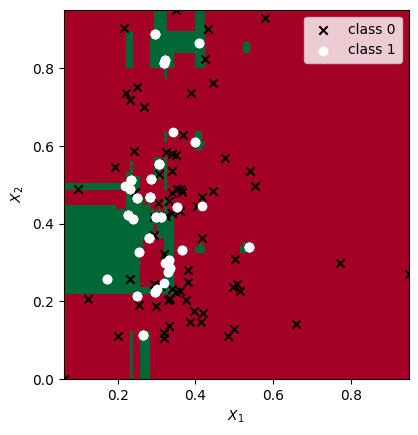

In [19]:
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)
Xte, yte = splitDF(dfB_Test)



def plot_class(c, X, y):
    m1 = ['k', 'w']
    m2 = ['x', 'o']
    i = np.where(y == c)[0]
    plt.scatter(X[i, 0], X[i, 1], c=m1[c], marker=m2[c], label='class %d' % c)


# Replace Xte, yte with your test set for case B
x1lim = [Xte[:, 0].min(), Xte[:, 0].max()]
x2lim = [Xte[:, 1].min(), Xte[:, 1].max()]

npts = 100
x1s = np.linspace(x1lim[0], x1lim[1], npts)
x2s = np.linspace(x2lim[0], x2lim[1], npts)

model = modelT7B
m = np.zeros((npts, npts))
for k1, x1 in enumerate(x1s):
    for k2, x2 in enumerate(x2s):
        x = np.array([x1, x2])
        m[k1, k2] = model.predict([x])

plt.figure()
plt.imshow(m.T, cmap='RdYlGn', origin='lower', extent=(x1lim[0], x1lim[1], x2lim[0], x2lim[1]))
for c in range(2):  # Assuming binary classification. Change if more classes.
    plot_class(c, Xte, yte)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.show()


#### (b) Clasify examples

In [20]:
# Load our samples dataset
test8 = pd.read_csv('ds07_samples.csv')
test8 #display dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.542,0.928,0.0,-4.402,1.0,0.0902,0.0017,0.1340,0.0836,0.186,128.021,185625.0,0
1,0.828,0.580,7.0,-4.395,1.0,0.0941,0.0255,0.0000,0.1030,0.407,89.973,235067.0,0
2,0.769,0.787,11.0,-3.909,1.0,0.3670,0.1890,0.0000,0.1290,0.836,126.770,159715.0,1
3,0.786,0.808,7.0,-3.702,1.0,0.0882,0.0846,0.0003,0.0822,0.609,105.027,301714.0,1


In [21]:
# Drop the 'class' column from the DataFrame and convert the remaining data to a numpy array.
test8 = np.array(test8.drop('class',axis=1))

# Separation of the features and labels.
xA8, yA8 = splitDF(dfA)

'''
The model 'modelT7A', which has been trained in Task 7, is fitted again here with the features
and labels from Case A
'''
trainModel8 = modelT7A.fit(xA8, yA8)
predictions = trainModel8.predict(test8) # Predict the classes of the new samples
predictions # Display predictions

array([0, 0, 0, 0], dtype=int64)

In [22]:
'''
Calculation of the probability estimates for each class for each "test8" sample.
The 'proba' array will contain the probabilities for each class.
'''
proba = trainModel8.predict_proba(test8)
proba

array([[0.93636364, 0.06363636],
       [0.78778011, 0.21221989],
       [0.80569347, 0.19430653],
       [0.83083333, 0.16916667]])

(*1) In all cases, you have to evaluate the model performance:
 * a. For tasks T1 – T3, use a train set/test set strategy (holdout cross validation), with 70% of the dataset for training and 30% for testing.
 * b. For tasks T4 – T7, use 3-repetitions, 5-fold cross validation. Report on the average values and the standard deviations.

 *2 The source code in this box should make reference to the variables defined in a previous box, the one corresponding to the best model.